# Chapter 4: Machine Learning



In [ ]:
import pandas
import sklearn
import numpy

print(pandas.__version__)
print(sklearn.__version__)
print(numpy.__version__)

1.3.5
1.0.2
1.21.5


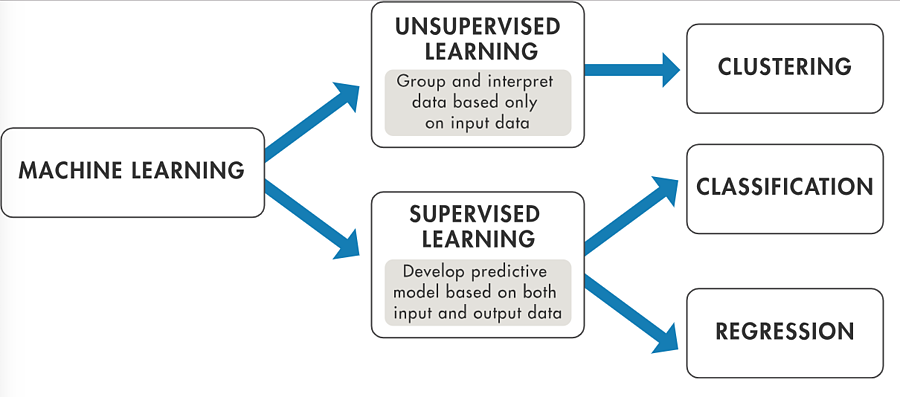

We will classify machine learning approaches into two: supervised and unsupervised.

### Supervised Machine Learning
This type of Machine Learning uses algorithms that "learn" from the data entered by a person. In supervised Machine Learning:

- Human intervention is needed to label, classify and enter the data in the algorithm.
- The algorithm generates expected output data, since the input has been labeled and classified by someone.
- There are two types of data that can be introduced in the algorithm:
    - __Classification__: classify an object within different classes. For instance, to determine if a patient is sick or if an email is spam.
    - __Regression__: predict a numerical value. It would be the case of the prices of a house when choosing different options or the demand of occupation of a hotel.
- Some practical applications of this type of Machine Learning:
    - Predicting the cost of an accident in the case of insurance companies.
    - The detection of bank fraud by financial entities.
    - The forecast of breakdown in the machinery of a company.

### Unsupervised Machine Learning
Unlike the previous case, there is no human intervention in this type of Machine Learning. Here the algorithms learn from data with untagged elements looking for patterns between them. In this case:

- Input data is entered without labeling.
- There’s no need of human intervention.
- There are two types of algorithms for unsupervised Machine Learning:
    - __Clustering__: classifies the output data into groups. This is the case of customer segmentations according to what they have purchased.
    - __Association__: discover rules within the data set. For instance, those customers who buy a car also take out insurance, which is why the algorithm detects this rule.
- There are other practical cases in which this type of Machine Learning is used:
    - The segmentation of clients in a bank.
    - The classification of patients in a hospital.
    - The system of content recommendations according to the user's consumption in streaming video platforms.



References:<br>
https://blog.bismart.com/en/machine-learning-supervised-unsupervised-differences

In supervised machine learning we train a model from a "training data", which contains previously seen observations.
Let's say we would like to predict the color of a wine based on the reviews written about it.

The training data (previously seen observations) for this task might contain following "review" - "label" pairs, where the "label" is the color of a wine (the value we want to predict).

```Review 1:``` <br>
Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.

```Label 1:``` <br>
Red

```Review 2:``` <br>
Crisp and on the sweet side, this PG has flavors of honey, lemons, limes, green apples, figs and peppery spices. Nice as a cocktail sipper. Try with Chinese food for something different.

```Label 2:``` <br>
White

...




Using this training data, a given machine learning algorithm can learn to map certain "features" from these reviews to the corresponding "label".
For example if our features are boolean values to indicate if a noun (from all possible nouns) appears in a review that appear in a review, the algorithm might learn that "tannin" is a good predictor for "Red" wine and "lime" is perhaps a good predictor of "White" wine.
In traditional machine learning approaches (not neural networks), features are extracted by humans and can consist of any type of information, which we think might be useful to predict a given "label".

What other features can we extract from wine reviews to predict wine color?

The power of machine learning comes with its ability to map combinations of features to labels that it can learn from a very large data set, that is difficult for a human to process. The following illustration summarizes the steps we need to take to train a machine learning model and to use it to make predictions:




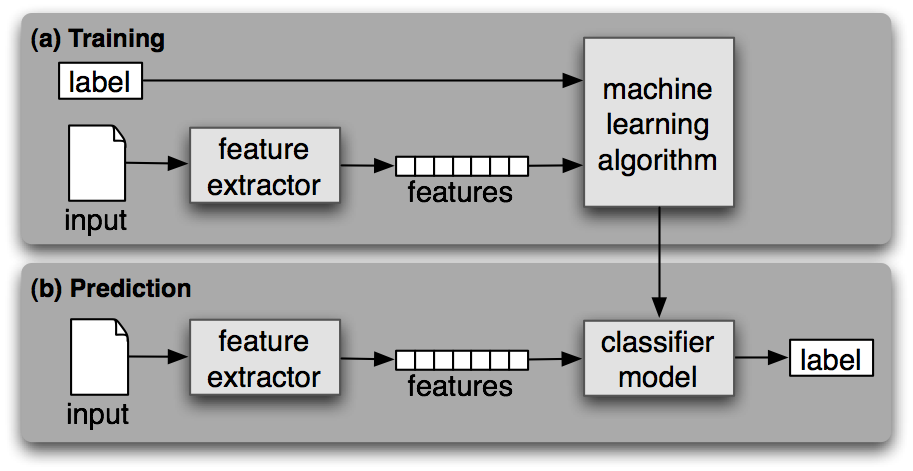

In the remainder of the course, we will be extracting features (i.e. feature engineering) and training machine learnin models for two tasks:
- Predicting wine color from wine reviews (Classification)
- Predicting wine score from wine reviews (Regression)

We will use the following three packages:<br>
__pip install scikit-learn__ (machine learning)<br>
__pip install pandas__ (handle csv files)<br>
__pip install numpy__ (feature vectors) <br>

### Pandas data structures
There are two types of data structures in pandas: __Series__ and __DataFrames__.

__Series__: a pandas Series is a one dimensional data structure (“a one dimensional ndarray”) that can store values — and for every value it holds a unique index, too.

__DataFrame__: a pandas DataFrame is a two (or more) dimensional data structure – basically a table with rows and columns. The columns have names and the rows have indexes.

In [1]:
import pandas

# Let's load the training data from a csv file
train_set = pandas.read_csv('./train.csv', sep='\t', encoding='utf-8')
train_set



,File name,URL,Color,Misc1,Misc2,Brand,Year,Price v1,Price v2,Grape type v1,...,Alcohol,Region,Country,Misc4,Score v1,Score v2,Reviewer,Review,Review date,Misc5
0,red-bicyclette-2005-merlot-vin-pays-doc.txt,http://buyingguide.winemag.com/catalog/red-bic...,Red,no,no,Red Bicyclette 2005 Merlot (Vin de Pays d'Oc),2005,12,$12,merlot,...,13.5%,"Vin de Pays d'Oc, Languedoc-Roussillon",France,E & J Gallo,82,82,W.E.,Raspberry and cherry aromas mix with more matu...,3/1/2009,unk
1,bodegas-artazu-2008-santa-cruz-grenache-garnac...,http://buyingguide.winemag.com/catalog/bodegas...,Red,no,no,Bodegas Artazu 2008 Santa Cruz de Artazu Garna...,2008,47,$47,grenache,...,14.5%,"Navarra, Northern Spain",Spain,Folio Fine Wine Partners,86,86,Michael Schachner,"This Navarran Garnacha is more interesting, of...",2/1/2013,unk
2,forgeron-2008-muscat-orange-columbia-valley-wa...,http://buyingguide.winemag.com/catalog/forgero...,unk,yes,no,Forgeron 2008 Orange Muscat (Columbia Valley (...,2008,46,$23/375 ml,muscat,...,9.5%,"Columbia Valley (WA), Columbia Valley, Washington",US,unk,90,90,Paul Gregutt,A fine complement to the Forgeron Late Harvest...,11/1/2010,unk
3,lewis-1997-reserve-cabernet-sauvignon-napa-val...,http://buyingguide.winemag.com/catalog/lewis-1...,Red,no,no,Lewis 1997 Reserve Cabernet Sauvignon (Napa Va...,1997,60,$60,cabernet_sauvignon,...,14.2%,"Napa Valley, Napa, California",US,unk,96,96,W.E.,"Complex aromas of cassis, dough, espresso, bac...",11/1/2000,unk
4,balletto-2006-pinot-grigio-gris-gris-sonoma-ru...,http://buyingguide.winemag.com/catalog/ballett...,White,no,no,Balletto 2006 Pinot Gris (Russian River Valley),2006,14,$14,pinot_gris,...,13.5%,"Russian River Valley, Sonoma, California",US,unk,85,85,S.H.,"Crisp and on the sweet side, this PG has flavo...",5/1/2008,unk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,gorman-2009-cry-baby-late-harvest-chenin-blanc...,http://buyingguide.winemag.com/catalog/gorman-...,unk,yes,no,Gorman 2009 The Cry Baby Late Harvest Chenin B...,2009,50,$25/375 ml,chenin_blanc,...,15.2%,"Columbia Valley (WA), Columbia Valley, Washington",US,unk,92,92,Paul Gregutt,"Opening with fruity, bubble gum scents, this b...",12/31/2010,unk
9996,luna-2008-pinot-grigio-gris-grigio-napa-valley...,http://buyingguide.winemag.com/catalog/luna-20...,White,no,no,Luna 2008 Pinot Grigio (Napa Valley),2008,18,$18,pinot_gris,...,14.1%,"Napa Valley, Napa, California",US,unk,85,85,S.H.,"Soft, dry and simple, with modest peach, pinea...",6/1/2011,unk
9997,concannon-2007-heritage-petite-sirah-central-c...,http://buyingguide.winemag.com/catalog/concann...,Red,no,no,Concannon 2007 Heritage Petite Sirah (Livermor...,2007,60,$60,petite_sirah,...,14.5%,"Livermore Valley, Central Coast, California",US,unk,87,87,Virginie Boone,"Age has been kind to this Petite, one of Conca...",4/1/2012,unk
9998,isenhower-cellars-2004-river-beauty-shiraz-syr...,http://buyingguide.winemag.com/catalog/isenhow...,Red,no,no,Isenhower Cellars 2004 River Beauty Syrah (Hor...,2004,32,$32,syrah,...,14.8%,"Horse Heaven Hills, Columbia Valley, Washington",US,unk,92,92,Paul Gregutt,Isenhower changes the vineyard sources for thi...,3/1/2007,unk


## Classification: Logistic regression

For classification tasks, Logistic regression models the probabability of an event occurring ("Red", "White", "Rosé") depending on the values of the independent variables (features).

Q: What are some indicators (features) of a wine being red? 

We know that z is the weighted sum of the evidence for the class (probability of the class occurring).<br>


\begin{align}
z = c_0+c_1*𝑥_1+c_2*𝑥_2+...+c_𝑛*𝑥_𝑛
\end{align}

The larger the weight the greater impact the given feature has on the final decision:<br>
- large positive values indicate a positive impact (for the event to occur)
- large negative values indicate a negative impact (for the event not to occur)

Q: What kind of a coefficient do you expect to see for "Tannin" for the labels "Red" and "White"?


Z value is between -∞ and +∞. 
Therefore we apply the sigmoid (or logistic function) to this value to obtain prob. values between 0 and 1.
The final probability scores let the model predict the label. If the prob of "Red" is higher than all other labels, the prediction will be "Red".



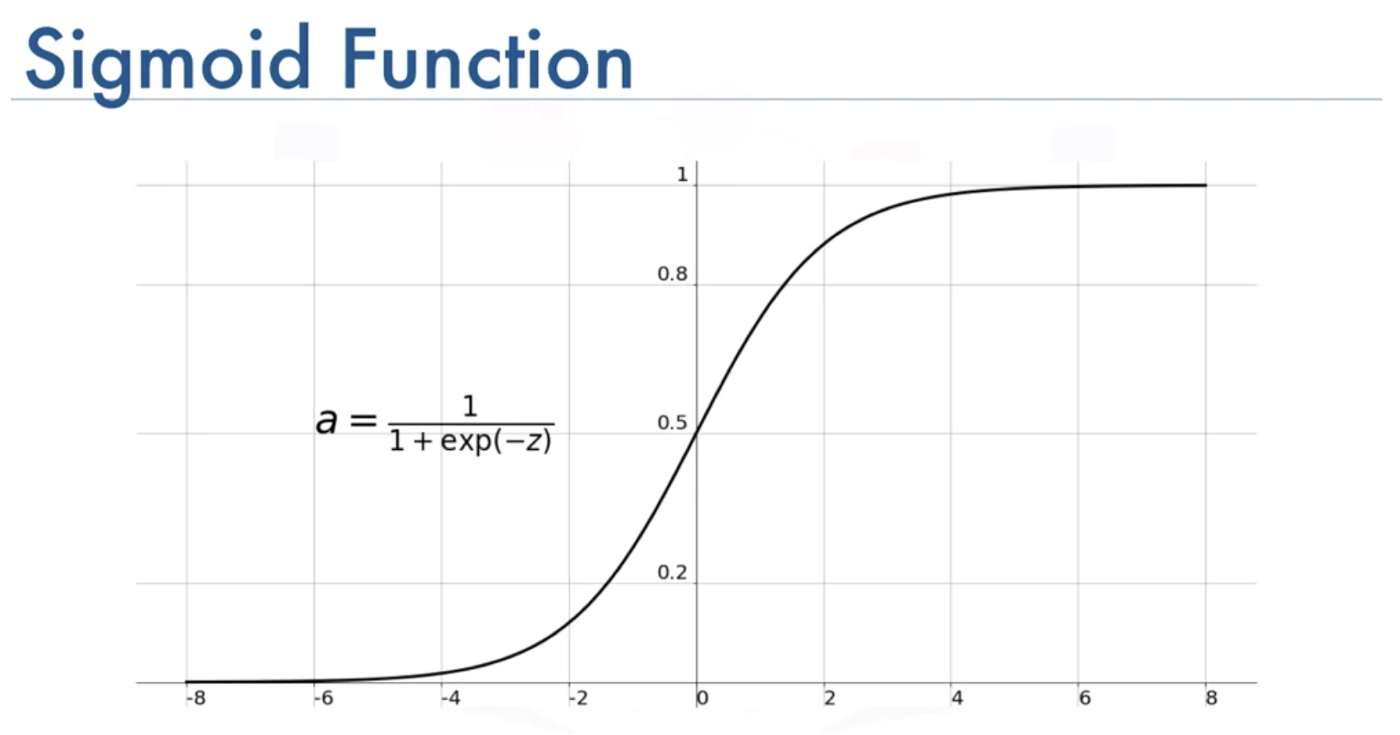

Let's try to build a simple logistic regression model to predict the wine color from the given reviews!

In [2]:
# To build a machine learning model, we are only interested in the "Review" and "Color" information for now
train_subset = train_set[["Review", "Color"]]
train_subset

,Review,Color
0,Raspberry and cherry aromas mix with more matu...,Red
1,"This Navarran Garnacha is more interesting, of...",Red
2,A fine complement to the Forgeron Late Harvest...,unk
3,"Complex aromas of cassis, dough, espresso, bac...",Red
4,"Crisp and on the sweet side, this PG has flavo...",White
...,...,...
9995,"Opening with fruity, bubble gum scents, this b...",unk
9996,"Soft, dry and simple, with modest peach, pinea...",White
9997,"Age has been kind to this Petite, one of Conca...",Red
9998,Isenhower changes the vineyard sources for thi...,Red


In [4]:
# Let's extract only these two columns from the data 
train_reviews = train_set['Review'].to_list()
train_colors = train_set['Color'].to_list()
print(train_reviews[:5])
print(train_colors[:5])



['Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.', 'This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.', 'A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.', 'Complex aromas of cassis, dough, espresso, bacon, and cola create instant interest. It seduces with its rich dark fruit and earth flavors, and a concentrated, suave mouthfeel. Big 

In [5]:
# What are the unique labels
print(list(set(train_colors)))

# Let's also print the count of each color label in this data set
white_count = train_colors.count("White")
red_count = train_colors.count("Red")
rose_count = train_colors.count("Rose")
unk_count = train_colors.count("unk")
print(white_count, red_count, rose_count, unk_count)


['White', 'Rose', 'unk', 'Red']
2968 6130 222 680


When processing large volumes of text, the statistical models are usually more efficient if you let them work on batches of texts. spaCy’s __nlp.pipe()__ method takes an iterable of texts and yields processed Doc objects. 

In [6]:
import spacy
import sys

# Load the small English model in SpaCy
nlp = spacy.load("en_core_web_sm")

# Process the list of reviews
# Use nlp.pipe to process the list of reviews (instead of looping over the list and processing them one by one)
train_doc_reviews = nlp.pipe(train_reviews)




In [7]:
# Let's print the text of the first 5 nlp objects (reviews)
for review in list(train_doc_reviews)[:5]: 
    print(review.text)
    print()

Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.

This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.

A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.

Complex aromas of cassis, dough, espresso, bacon, and cola create instant interest. It seduces with its rich dark fruit and earth flavors, and a concentrated, suave mouthfeel. Big flavors 

Now it's time to find useful features in this data set that can help us to predict wine color.
We will start with a limited list of 10 features (10 terms in this example).
We will then represent each review with the 10 words and indicate if the words in our list exist in a given review or not.
We can do this by first creating a zero vector of length 10 and change the value of each feature to 1 if the corresponding word exists in the given review.

Let's start!<br>
Pick 10 terms from the following candidates, which you think might be good predictors of wine color
(we will not use the colors we are predicting as terms, such as "white", "red" or "rose").
Use lemmas of words to make your list.




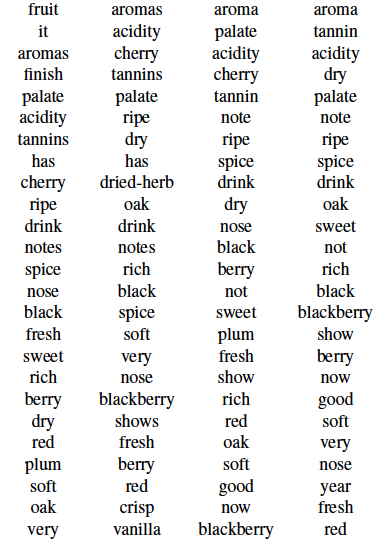

In [8]:
import numpy

# assign the list of terms to a variable
terms = ["tannin", "cherry", "oak", "fresh", "vanilla", "rich", "blackberry", "very", "dry", "spice"]

#Review 1:
#Raspberry and ---cherry--- aromas mix with more mature notes of fall leaves and lead into some earthy complexity 
#on the somewhat thin palate. Velvety ---tannins--- and moderate acidity make for easy drinking. Notes of woods and 
#mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.

#terms in this review: tannin, cherry
#features_review1 = [1, 1, 0, 0, ..., 0]

# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of rows, Y = no. of columns
# list of reviews = 10.000 reviews (rows), 1 column
# list of features = 10.000 rews, 10 columns (features)
train_features = numpy.zeros((len(train_reviews), len(terms))) # tuple of (x, y) values

# Print the shape of this 2d array
print(train_features.shape)


(10000, 10)


In [9]:
import sys
import spacy



# Load the small English model in SpaCy
nlp = spacy.load("en_core_web_sm")

# Process the list of reviews
# Use nlp.pipe to process the list of reviews (instead of looping over the list and processing them one by one)
train_doc_reviews = nlp.pipe(train_reviews)
# Let's check first how these features look like
# We will print the first review which contains one of the terms we picked, as well as the "label" for the wine

for review, label in zip(train_doc_reviews, train_colors):
    print(review)
    # We will use the lemma of each token
    lemma_list = [token.lemma_ for token in review] 
    print(lemma_list)
    #print(tokens_list)
    for term in terms:
        if term in lemma_list:
            print(term)
           
    print("Label is " + label)
    sys.exit()

          

Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
['Raspberry', 'and', 'cherry', 'aroma', 'mix', 'with', 'more', 'mature', 'note', 'of', 'fall', 'leave', 'and', 'lead', 'into', 'some', 'earthy', 'complexity', 'on', 'the', 'somewhat', 'thin', 'palate', '.', 'velvety', 'tannin', 'and', 'moderate', 'acidity', 'make', 'for', 'easy', 'drinking', '.', 'note', 'of', 'wood', 'and', 'mushroom', 'on', 'the', 'finish', 'suggest', 'that', 'this', 'wine', 'will', 'not', 'have', 'much', 'go', 'forit', 'by', 'the', 'end', 'of', '2009', '.']
tannin
cherry
Label is Red


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Now we will modify our feature vectors (zero-vectors initially).
We will do a simple modification: If a given feature (chosen word in our list) exists in a review, we will mark its value as 1 (instead of 0).

In [10]:
import spacy

nlp = spacy.load('en_core_web_sm')

#Recreate zero feature vectors
train_features = numpy.zeros((len(train_reviews), len(terms)))

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)


# loop over each review, label and feature vector at the same time (zip)
for review, label, f in zip(train_doc_reviews, train_colors, train_features):
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in terms:
        print(term)
        # if a given term is in the review
        if term in tokens_list:
            # we will get its ID from the feature vector first
            term_id = terms.index(term)
            print(term_id)
            # and change the corresponding value to 1 (for this term)
            f[term_id] = 1
            print(f)
    print()
    print(review)
    print(label)
    sys.exit()

tannin
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
cherry
1
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
oak
fresh
vanilla
rich
blackberry
very
dry
spice

Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
Red


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

#Recreate zero feature vectors
train_features = numpy.zeros((len(train_reviews), len(terms)))

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

# Now we can repeat the same process for all terms and for all reviews
# This will result in the feature vectors per review, which we can use to train our machine learning model
for review, f in zip(train_doc_reviews, train_features):
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in terms:
        if term in tokens_list:
            term_id = terms.index(term)
            f[term_id] = 1



### DIY
Let's modify the the codes above so that:
- We use a new term list for the same task: terms2 = ["fall", "sweet", "plum"]
- Create a set of zero-vectors for the same training data set with the correct size
- Process the reviews with small English model in Spacy
- Transform reviews to feature sets: Loop over each review/zero-vector pair and update the zero-vector indexes (to 1) if any of the 3 terms are found in the review.
- Print the first 3 reviews, corresponding feature sets for these reviews and the correct label (color) 

The output of this code should be the following: <br>


```
Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
[1. 0. 0.]
Red

This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.
[0. 0. 1.]
Red

A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.<br>
[0. 1. 0.]
unk

```


In [11]:
import numpy

# assign the list of terms to a variable
three_terms = ["fall", "sweet", "plum"]

# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of rows, Y = no. of columns
three_terms_features = numpy.zeros((len(train_reviews), len(three_terms)))
print(three_terms_features.shape)

(10000, 3)


In [12]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)


# loop over each review, label and feature vector at the same time (zip)
#print(zip(train_doc_reviews, train_features2, train_colors))
for review, f, c in list(zip(train_doc_reviews, three_terms_features, train_colors))[:3]:
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in three_terms:
        if term in tokens_list:
            term_id = three_terms.index(term)
            f[term_id] = 1
    print(review)
    print(f)
    print(c)

Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
[1. 0. 0.]
Red
This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.
[0. 0. 1.]
Red
A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.
[0. 1. 0.]
unk


## Training Logistic Regression Model with *Sklearn*

Now let's import sklearn (and logistic regression) to train the model.<br>
We need two data sets to train the model: the feature vector per review and the corresponding label (wine color)




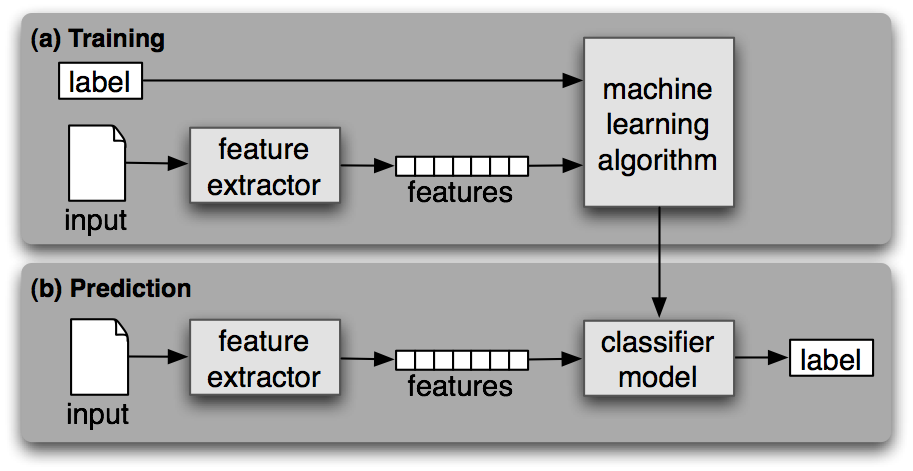

In [13]:
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model from LogisticRegression class
# all parameters not specified are set to their defaults
lr = LogisticRegression()

# Train the model on the data, storing the information learned from the dat`a
# Model is learning the relationship between digits (x_train) and labels (y_train)
lr.fit(train_features, train_colors)

# Let's see what are the possible labels to predict (and in which order they are stored)
print(lr.classes_)

# We can get additional information about all the parameters used with LogReg model
print(lr.get_params())

['Red' 'Rose' 'White' 'unk']
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let's save (and load) our model so that we don't have to train it again!


In [14]:
#!{sys.executable} -m pip install pickle-mixin
import pickle
print(pickle.format_version)


4.0


In [15]:
import pickle


# Save to file in the current working directory
pkl_filename = "lr_model1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Let's see what are the possible labels to predict (and in which order they are stored)
print(pickle_model.classes_)

# We can get additional information about all the parameters used with LogReg model
print(pickle_model.get_params())

['Red' 'Rose' 'White' 'unk']
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Predicting Labels Using the Model

Our model is ready!
Now it's time to make predictions. To be able to use our model on the test set, we need to process it the same way we did with the training set:

1. Make a list of reviews and a list of labels of the test set
2. Create zero-vectors to represent our features
3. Modify these vectors by checking if our terms appear in each review

In [16]:
import pandas
test_set = pandas.read_csv('./test.csv', sep='\t', encoding='utf-8')
test_set


# Let's extract only the relevant columns, and put them in lists
test_reviews = test_set['Review'].to_list()
test_colors = test_set['Color'].to_list()

# Print the first five item in each list to make sure it looks ok
print(test_reviews[:5])
print(test_colors[:5])

# Check the length of the items in the test_set
print(len(test_reviews))


['Leather, spice, tobacco and tea emerge from the nose of this Sicilian blend of Nero d’Avola, Syrah, Merlot, Cabernet and Petit Verdot. You’ll get aromas of clove, allspice and vanilla behind vibrant blueberry and raspberry.', 'So pale that it’s almost colorless, the Blangé—made from Arneis grapes in Piedmont—has the oak-meets-citrus nose you’d expect of a Chardonnay. The lemon, grapefruit and pear flavors, coupled with a superspritzy, Asti-like mouthfeel, make this a good Sunday brunch eye-opener. Its slightly high acidity could cut through any French toast or waffle that you throw its way. Finishes medium-long, with herbal notes. ', 'Comes across on the earthy, herbal side, although there are some pretty raspberry notes on the palate. A little heavy, and lacks perhaps some delicacy. A sweet cola-like finish completes the picture.', 'What a wonderful wine to pair with spaghetti alle vongole or calamari fritti. Made from Grechetto grapes and aged only in stainless steel, this is fresh

In [17]:
# Create zero vectors (of length 10) for each review (of len(test_reviews))
test_features = numpy.zeros((len(test_reviews), len(terms)))
print(test_features.shape)



(1000, 10)


### DIY
Let's update the zero vectors 
- Loop over each review and (zero) feature vector for the test set
- get a list of token lemmas for each review
- Loop over term list and if a term is in list of lemmas, update the feature vector value to 1 for this term index

In [18]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
test_doc_reviews = nlp.pipe(test_reviews)

# Update the feature vectors by checkin if the terms exist per review
for review, f in zip(test_doc_reviews, test_features):
    tokens_list = [token.lemma_ for token in review]
    for term in terms:
        if term in tokens_list:
            term_id = terms.index(term)
            f[term_id] = 1 

Ok our test set is also processed!
Now we can make predictions using our trained model.



In [19]:
# We can predict a label for individual items in the test set
# Let's define a function to get an overview of our data sets

def print_item(i):
  # Print the review
  print(test_reviews[i])
  # Print the features vector
  print(test_features[i])
  # Print the terms that correspond to the features
  print(terms)
  # Print the correct label we would like to predict
  print(test_colors[i])

print_item(3)
print_item(12)


What a wonderful wine to pair with spaghetti alle vongole or calamari fritti. Made from Grechetto grapes and aged only in stainless steel, this is fresh, youthful, tangy and crisp, with aromas of citrus, kiwi, honeydew and peach.
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
['tannin', 'cherry', 'oak', 'fresh', 'vanilla', 'rich', 'blackberry', 'very', 'dry', 'spice']
White
Powerful and rich, from superripe grapes, this wine follows a style in Bordeaux that seems to want to make white Burgundy. It is creamy, rounded, spicy from toast, with white fruits, only a touch of citrus, and a full, intense aftertaste.
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
['tannin', 'cherry', 'oak', 'fresh', 'vanilla', 'rich', 'blackberry', 'very', 'dry', 'spice']
White


In [21]:
# Print the output of the model we trained
print()
print("Prediction:")
# Predict the label
print(lr.predict([test_features[3]]))
#lr.predict(test_features)
# Predict the label but also tell us the probabilities for predicting each possible label
print(lr.predict_proba([test_features[3]]))

#logisticRegr.predict(features_test[0].reshape(1,-1))

# Let's see what are the possible labels to predict (and in which order they are stored)
print(pickle_model.classes_)


Prediction:
['Red']
[[0.61298418 0.02220077 0.29681309 0.06800196]]
['Red' 'Rose' 'White' 'unk']


Let's put all this code in a function which takes only an ID as input, which will than be used to print all the necessary information and predict the test item with this ID.

In [22]:
def predict(i):
    # Print the review of the index
    print(test_reviews[i])
    # print the features of the index
    print(test_features[i])
    # print all terms
    print(terms)
    # print the correct label of the index
    print(test_colors[i])

    print()
    print("Prediction:")
    # print the prediction for the features of this index
    print(lr.predict([test_features[i]]))
    # print the probabilities for each label predictions
    print(lr.predict_proba([test_features[i]]))
    print()

In [23]:

predict(3)
predict(12)

What a wonderful wine to pair with spaghetti alle vongole or calamari fritti. Made from Grechetto grapes and aged only in stainless steel, this is fresh, youthful, tangy and crisp, with aromas of citrus, kiwi, honeydew and peach.
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
['tannin', 'cherry', 'oak', 'fresh', 'vanilla', 'rich', 'blackberry', 'very', 'dry', 'spice']
White

Prediction:
['Red']
[[0.61298418 0.02220077 0.29681309 0.06800196]]

Powerful and rich, from superripe grapes, this wine follows a style in Bordeaux that seems to want to make white Burgundy. It is creamy, rounded, spicy from toast, with white fruits, only a touch of citrus, and a full, intense aftertaste.
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
['tannin', 'cherry', 'oak', 'fresh', 'vanilla', 'rich', 'blackberry', 'very', 'dry', 'spice']
White

Prediction:
['Red']
[[0.61298418 0.02220077 0.29681309 0.06800196]]



## Analysing the model
So far so good!
We are able to make predictions with the model we trained.
What about the model itself? How does each feature affect the result?
We can see the importance of each feature by looking at their weights (i.e. coefficients)

\begin{align}
z = c_0+c_1*𝑥_1+c_2*𝑥_2+...+c_𝑛*𝑥_𝑛
\end{align}

In the formula above, each feature is denoted as $X_i$ and each weight (or coefficient) with $c_i$.

In [ ]:
for label, coefs in zip(lr.classes_, lr.coef_):
    print(label)
    for t, c in zip(terms, coefs):
        print(t, c)
    print()



Red
tannin -0.022758866811883164
cherry 0.021410212840367933
oak 0.002297782385531127
fresh -0.011272549731209665
vanilla 0.1272522073934248
rich -0.03891057013047752
blackberry -0.027411959388588175
very 0.05753095271106731
dry 0.021655683335745822
spice 0.1084163994415686

Rose
tannin -0.0068088860659319085
cherry -0.009220299056087736
oak -0.05936323892080283
fresh -0.1080606044955459
vanilla -0.15544178371710063
rich 0.0719905936943876
blackberry -0.059901196194399604
very -0.11506732277039979
dry -0.032289838345879444
spice -0.0767815910932612

White
tannin 0.08137617178055684
cherry -0.010010147095239433
oak 0.02805872076436844
fresh 0.1569004434608051
vanilla 0.1688920450129911
rich -0.004509355239467443
blackberry 0.010723805926875966
very 0.07778065173246178
dry -0.01485110279502696
spice 0.03772585395239031

unk
tannin -0.05180841890274399
cherry -0.002179766689037488
oak 0.029006735770903704
fresh -0.03756728923404907
vanilla -0.14070246868931535
rich -0.028570668324442758
b

How can we interpret the coefficients?
The coefficients are "learned" by the model per label. The lager positive values of a coefficient indicates that the existence of the corresponding feature (in other words when it is a 1) increases the probability of that label occurring more.

As an example, the terms "blackberry" and "tannin" have the largest values for predicting the label "Red". The existence of these words in a given review therefore increases the probability of the prediction for "Red" more than other terms. In other words, these terms are the most important terms for detecting "Red" (compared to the other terms I have in my list).

Negative values on the other hand reduce the probability for predicting a label. 
As an example, "Cherry" and "Tannin" have the largest negative values for predicting the label "White". It does not mean that these features are not important. On the contrary, they are very important as if one of these terms appear in a review, the prediction will more likely not to be "White".

The values that are near to one (positive or negative) are the least important (informative) features for predicting a given label.

In the above formula, there is another value $c_0$. This value is called the __intercept__ (or bias).
The intercept is the expected mean value for a given label when all the weights are 0. In other words, we get an intercept value per label, which refers to the expected outcome (high positive values indicate more likely outcomes) when the values of all the features are 0.
The interpretation of the intercept values are the same as other coefficients. 
If all features are zero, the intercept indicates the most likely outcome. The largest positive intercept value will be the "bias" towards that label.

We can also display the intercept for each label as follows:


In [ ]:
for label, coefs, intercept in zip(lr.classes_, lr.coef_, lr.intercept_):
    print(label)
    for t, c in zip(terms, coefs):
        print(t, c)
    print("INTERCEPT:", intercept)
    print()

#How can we interpret the coefficients and the intercept?


Red
tannin -0.022758866811883164
cherry 0.021410212840367933
oak 0.002297782385531127
fresh -0.011272549731209665
vanilla 0.1272522073934248
rich -0.03891057013047752
blackberry -0.027411959388588175
very 0.05753095271106731
dry 0.021655683335745822
spice 0.1084163994415686
INTERCEPT: 1.5334680273512995

Rose
tannin -0.0068088860659319085
cherry -0.009220299056087736
oak -0.05936323892080283
fresh -0.1080606044955459
vanilla -0.15544178371710063
rich 0.0719905936943876
blackberry -0.059901196194399604
very -0.11506732277039979
dry -0.032289838345879444
spice -0.0767815910932612
INTERCEPT: -1.696678027692969

White
tannin 0.08137617178055684
cherry -0.010010147095239433
oak 0.02805872076436844
fresh 0.1569004434608051
vanilla 0.1688920450129911
rich -0.004509355239467443
blackberry 0.010723805926875966
very 0.07778065173246178
dry -0.01485110279502696
spice 0.03772585395239031
INTERCEPT: 0.774910524341363

unk
tannin -0.05180841890274399
cherry -0.002179766689037488
oak 0.02900673577090

### DIY: Training pipeline from scratch 
CELL 1:
- Open train.csv with pandas and assign reviews and color labels to two lists

CELL 2:
- Create a list of terms: ["fall", "sweet", "plum"]
- Create zero feature vectors for the training set

CELL 3:
- Update zero feature vectors by processing the training set

###  The remaining steps need to be filled
CELL 4:
- Use these features (3 terms) to train a logistic regression model
- Print the coefficients and the intercept for each term, per label
- Make sure to use a new variable for the new logistic regression model

CELL 5: 
- Open test.csv with pandas and assign reviews and colors to two lists
- Create zero feature vectors for the test set
- Use a new variable name for these features
        
CELL 6:
- Process the test set and update feature vectors

CELL 7:
- Define a function predict2, which takes a review index as input and prints:
    - the review
    - the features
    - the terms
    - the correct label
    - the prediction (using the trained model)
    - the probability of each class being predicted (using the trained model)

CELL 8
- Using the function predict2, predict the labels for review 0 and review 10




In [25]:
# CELL 1
import pandas

# Let's load the training data from a csv file
train_set = pandas.read_csv('./train.csv', sep='\t', encoding='utf-8')
train_set

# Let's extract only these two columns from the data 
train_reviews = train_set['Review'].to_list()
train_colors = train_set['Color'].to_list()

In [26]:
# CELL 2
import numpy

# assign the list of terms to a variable
terms2 = ["fall", "sweet", "plum"]

# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of rows, Y = no. of columns
train_features2 = numpy.zeros((len(train_reviews), len(terms2)))
print(train_features2.shape)

(10000, 3)


In [27]:
# CELL 3
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)


# loop over each review, label and feature vector at the same time (zip)
for review, f, c in zip(train_doc_reviews, train_features2, train_colors):
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in terms2:
        if term in tokens_list:
            term_id = terms2.index(term)
            f[term_id] = 1
    

In [28]:
# CELL 4
# Add your code here
from sklearn.linear_model import LogisticRegression

lr_short = LogisticRegression()
lr_short.fit(train_features2, train_colors)
for label, coefs, intercept in zip(lr_short.classes_, lr_short.coef_, lr_short.intercept_):
    print(label)
    for term, c in zip(terms2, coefs):
        print(term, c)
    print("INTERCEPT:", intercept)
    print()

Red
fall 0.12075617983663409
sweet -0.35440324869981304
plum 1.1358203133511398
INTERCEPT: 1.5349541184255264

Rose
fall -0.0665302319403285
sweet 0.1826103944611958
plum 0.14564506227016166
INTERCEPT: -1.7724632076860491

White
fall 0.32459058512770583
sweet -0.3906134347418622
plum -0.8969240087591135
INTERCEPT: 0.9563548973074154

unk
fall -0.3788165330240124
sweet 0.562406288980475
plum -0.3845413668621853
INTERCEPT: -0.7188458080464998



In [29]:
# CELL 5
# Add your code here
test_set = pandas.read_csv('./test.csv', sep="\t", encoding="utf-8")
test_reviews = test_set["Review"].to_list()
test_colors = test_set["Color"].to_list()

test_features2 = numpy.zeros((len(test_reviews), len(terms2)))
print(test_features2.shape)

(1000, 3)


In [30]:
# CELL 6
# Add your code here
import spacy

nlp = spacy.load("en_core_web_sm")
test_doc_reviews2 = nlp.pipe(test_reviews)

for review, feat in zip(test_doc_reviews2, test_features2):
    tokens_list = [token.lemma_ for token in review]
    for term in terms2:
        if term in tokens_list:
            term_id = terms2.index(term)
            feat[term_id] = 1
            


In [31]:
# CELL 7
# Add your code here
def predict2(index):
    print(test_reviews[index])
    print(test_features2[index])
    print(terms2)
    print(test_colors[index])
    print()
    print("Prediction:")
    print(lr_short.predict([test_features2[index]]))
    print(lr_short.predict_proba([test_features2[index]]))
    print(lr_short.classes_)
    print()


In [32]:
# CELL 8
# Add your code here
predict2(0)
predict2(10)

Leather, spice, tobacco and tea emerge from the nose of this Sicilian blend of Nero d’Avola, Syrah, Merlot, Cabernet and Petit Verdot. You’ll get aromas of clove, allspice and vanilla behind vibrant blueberry and raspberry.
[0. 0. 0.]
['fall', 'sweet', 'plum']
Red

Prediction:
['Red']
[[0.58744284 0.02150664 0.32936934 0.06168119]]
['Red' 'Rose' 'White' 'unk']

I haven’t been a fan of Santa Ynez Cabs for the simple reason that they’re so seldom ripe. You get this green, herb and mint streak that’s not flattering to Cab’s tannins. This wine is in that vein. 
[0. 0. 0.]
['fall', 'sweet', 'plum']
Red

Prediction:
['Red']
[[0.58744284 0.02150664 0.32936934 0.06168119]]
['Red' 'Rose' 'White' 'unk']



## Extending the feature set ###

Until now, we used 10 features (terms) to predict the color of a given wine, based on its review.
We can of course use more features, which is also the power of machine learning systems. 

In the following exercises, we will use all nouns in the training set as our term (feature) list.
Instead of being limited to 10 terms, we can now work with a larger vocabulary.
The advantage of this method is that there might be other terms (features), which might be useful to make the correct predictions.

Let's start by collecting all the nouns from the reviews in the training set.<br>



In [33]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_noun = []

for review in train_doc_reviews:
    for token in review:
        # If the token is a noun, we would like to add this to list_noun
        if token.pos_ == "NOUN":
            list_noun.append(token.lower_)

# We can also count the number of unique nouns to have an idea how large our feature vectors will be
print(len(list_noun))
print(list_noun)


109530
['cherry', 'aromas', 'notes', 'fall', 'leaves', 'complexity', 'palate', 'velvety', 'tannins', 'acidity', 'drinking', 'notes', 'woods', 'mushroom', 'finish', 'wine', 'end', 'lemony', 'aromas', 'nature', 'palate', 'racy', 'acidity', 'flavor', 'profile', 'cranberry', 'plum', 'notes', 'style', 'complement', '%', '%', 'alcohol', 'alcohol', 'power', 'focus', 'balance', 'aromas', 'cassis', 'dough', 'interest', 'fruit', 'earth', 'flavors', 'suave', 'mouthfeel', 'flavors', 'tannins', 'balance', 'years', 'time', 'side', 'flavors', 'honey', 'lemons', 'limes', 'apples', 'figs', 'peppery', 'spices', 'cocktail', 'sipper', 'food', 'today', 'quality', 'aromas', 'bacon', 'berries', 'forest', 'underbrush', 'loads', 'personality', 'citrus', 'notes', 'flavors', 'blossom', 'finishes', 'touch', 'apples', 'bucks', 'winery', 'acidity', 'honey', 'pineapple', 'smoke', 'flavors', 'wine', 'taste', 'honey', 'magic', 'blend', 'splash', 'flavors', 'herb', 'plum', 'hints', 'cumin', 'spices', 'interest', 'wine'

While this is a good start, we actually collected all nouns in the reviews, with repetition.
We actually need the unique list of nouns, as we are going to make a feature vector per review to indicate that if a noun exists in the review or not.

Another way of reducing the vector size is only to consider the lemmas of each word (so we don't need to consider all morphological variants of the same lemma).

Let's do that!

In [34]:
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_noun_lemma = []

for review in train_doc_reviews:
    for token in review:
        if token.pos_ == "NOUN":
            # In this case, we will add the lemma of the noun to our list and not the full word
            list_noun_lemma.append(token.lemma_)
            

# We are only interested in the list of unique nouns
list_noun_lemma_unique = list(set(list_noun_lemma))

# Let's print and see how many unique nouns we have
print(len(list_noun_lemma_unique))
print(list_noun_lemma_unique)

4098
['juice', 'play', 'thoroughbred', 'complaint', 'woodsy', 'pomegranate', '1930', 'contradiction', 'opt', 'sugariness', 'puckering', 'hefster', 'asperity', 'understanding', 'passionfruit', 'fact', 'Alberdi', 'allusion', 'drama', 'vegetable', 'satisfying', 'persona', 'purplish', 'grabby', 'up', 'ripening', 'character', 'risotto', 'pitch', 'detail', 'loin', 'convey', 'persistence', 'pillowy', 'halibut', 'mid-2008', 'quibble', 'mulch', 'shape', 'refill', 'amber', 'ruggedness', 'charmer', 'profile', 'avellino', 'baby', 'mouthfeel', 'levity', 'rum', 'bent', 'rosewater', 'grove', 'no', 'kind', 'browning', 'downfall', 'bucket', 'total', 'mass', 'enthusiast', 'hymn', 'garnish', 'glimmer', 'cloying', 'override', 'collaboration', 'descriptor', 'tropicality', 'substitute', 'whisper', 'strata', 'compensation', 'burlap', 'latent', 'aspect', 'auction', 'decant', 'puppy', 'portion', 'carrot', 'result', 'depth', 'neophyte', 'production', 'punchy', 'aesthetic', 'semblance', 'center', 'dimension', 'l

This looks much better as we have now a much smaller vector size!
Now let's create zero-vectors for our features, which we will modify per review.

In [35]:
import numpy

# columns, rows
train_features_nouns = numpy.zeros((len(train_reviews), len(list_noun_lemma_unique)))
print(train_features_nouns.shape)


# Repeat for the test set
test_features_nouns = numpy.zeros((len(test_reviews), len(list_noun_lemma_unique)))
print(test_features_nouns.shape)



(10000, 4098)
(1000, 4098)


Before modifying the feature vectors, let's check if everything looks ok one last time.


In [36]:

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_nouns):
    tokens_list = [token.lemma_ for token in review]
    # For each noun in our noun list
    for noun in list_noun_lemma_unique:
        # check if the noun exsist in this review
        if noun in tokens_list:
            # if yes, print the noun, the noun id (taken from the feature vector) and the review itself
            print(noun)
            noun_id = list_noun_lemma_unique.index(noun)
            print(noun_id)
            print(review)
            sys.exit()
            

mature
146
Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


This seems ok.
Let's see now if we can modify the feature-vectors correctly.

In [ ]:

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_nouns):
    tokens_list = [token.lemma_ for token in review]
    for noun in list_noun_lemma_unique:
        if noun in tokens_list:
            print(noun)
            noun_id = list_noun_lemma_unique.index(noun)
            print(noun_id)
            vector[noun_id] = 1
        if 1 in vector:
            print(vector.tolist())
            sys.exit()

cherry
55
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

NameError: name 'sys' is not defined

Now let's run the whole process on the training and test sets and generate our feature vectors.


In [37]:

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_nouns):
    tokens_list = [token.lemma_ for token in review]
    for noun in list_noun_lemma_unique:
        if noun in tokens_list:
            noun_id = list_noun_lemma_unique.index(noun)
            vector[noun_id] = 1

### DIY
Can you convert this process to a function so that we can use it for generating the feature-vectors for the test set (or for any input data set consisting of reviews and features)?

In [38]:
def generate_feature_vectors(reviews, features):
    for review, vector in zip(reviews, features):
        tokens_list = [token.lemma_ for token in review]
        for noun in list_noun_lemma_unique:
            if noun in tokens_list:
                noun_id = list_noun_lemma_unique.index(noun)
                vector[noun_id] = 1
    
    # this function does not return anything as it modifies "features" in place.
    
    

Now we can extract feature values for the test set using this function.

In [39]:
nlp = spacy.load('en_core_web_sm')

# Process test file with spacy
test_doc_reviews = nlp.pipe(test_reviews)

# Update feature vectors for the test set
generate_feature_vectors(test_doc_reviews, test_features_nouns)

Let's check if the features are generated correctly.
The first noun in the first review is "leather".
We can get the index of leather in list_noun_lemma_unique and use this index to check the value of it in the feature-vector for this review.

In [42]:
print(test_reviews[0])
leather_id = list_noun_lemma_unique.index("leather")

print(leather_id)
print(test_features_nouns[0][leather_id])

Leather, spice, tobacco and tea emerge from the nose of this Sicilian blend of Nero d’Avola, Syrah, Merlot, Cabernet and Petit Verdot. You’ll get aromas of clove, allspice and vanilla behind vibrant blueberry and raspberry.
2322
1.0


Everything seems ok.
Let's train our model now.

In [43]:
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model
# all parameters not specified are set to their defaults
lr_nouns = LogisticRegression()

# Train the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
lr_nouns.fit(train_features_nouns, train_colors)

# Let's see what are the possible labels to predict (and in which order they are stored)
print(lr_nouns.classes_)

# We can get additional information about all the parameters used with LogReg model
print(lr_nouns.get_params())


['Red' 'Rose' 'White' 'unk']
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
def predict_nouns(index):
    print(test_reviews[index])
    print(test_features_nouns[index])
    print(test_colors[index])

    print()
    print("Predictions:")
    # Print prediction
    print(lr_nouns.predict([test_features_nouns[index]]))
    # print prob of all label predictions
    print(lr_nouns.predict_proba([test_features_nouns[index]]))
    # print all labels
    print(lr_nouns.classes_)
    print()

In [ ]:
predict_nouns(0)
predict_nouns(10)

Leather, spice, tobacco and tea emerge from the nose of this Sicilian blend of Nero d’Avola, Syrah, Merlot, Cabernet and Petit Verdot. You’ll get aromas of clove, allspice and vanilla behind vibrant blueberry and raspberry.
[0. 0. 0. ... 0. 0. 0.]
Red

Predictions:
['Red']
[[9.95361425e-01 3.95720847e-03 1.71670600e-04 5.09696344e-04]]
['Red' 'Rose' 'White' 'unk']

I haven’t been a fan of Santa Ynez Cabs for the simple reason that they’re so seldom ripe. You get this green, herb and mint streak that’s not flattering to Cab’s tannins. This wine is in that vein. 
[0. 0. 0. ... 0. 0. 0.]
Red

Predictions:
['Red']
[[9.80716912e-01 6.03675872e-05 1.77928105e-02 1.42990985e-03]]
['Red' 'Rose' 'White' 'unk']



Let's save our model.

In [45]:
import pickle

# Save to file in the current working directory
pkl_filename = "logreg_nouns.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_nouns, file)